In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [2]:
# Load the data
df = pd.read_csv("new_unicorn_data_updated.csv")

In [3]:
df.head()

,Company,Date Joined,Industry,Country,City,Continent,Year Founded,Funding,Funding_Numeric ($B),Valuation (March) ($B),Select Investors (March),Valuation (November) ($B),Select Investors (November),Years to Unicorn,Most Recent Valuation
0,SpaceX,2012-12-01,Other,United States,Hawthorne,North America,2002,$7B,7.000,100,"Founders Fund, Draper Fisher Jurvetson, Rothen...",127.0,"Founders Fund, Draper Fisher Jurvetson, Rothen...",10,127.0
1,SHEIN,2018-07-03,E-commerce And Direct-to-consumer,China,Shenzhen,Asia,2008,$2B,2.000,100,"Tiger Global Management, Sequoia Capital China...",100.0,"Tiger Global Management, Sequoia Capital China...",10,100.0
2,Stripe,2014-01-23,Fintech,United States,San Francisco,North America,2010,$2B,2.000,95,"Khosla Ventures, LowercaseCapital, capitalG",95.0,"Khosla Ventures, LowercaseCapital, capitalG",4,95.0
3,Klarna,2011-12-12,Fintech,Sweden,Stockholm,Europe,2005,$4B,4.000,46,"Institutional Venture Partners, Sequoia Capita...",6.7,"Institutional Venture Partners, Sequoia Capita...",6,6.7
4,Canva,2018-01-08,Internet Software And Services,Australia,Surry Hills,Oceania,2012,$572M,0.572,40,"Sequoia Capital China, Blackbird Ventures, Mat...",40.0,"Sequoia Capital China, Blackbird Ventures, Mat...",6,40.0


In [4]:
# Fix negative values

df['Years to Unicorn'] = df['Years to Unicorn'].replace(-3, 1)

df['Years to Unicorn'] = df['Years to Unicorn'].replace(0, 1)


In [5]:
# Encode 'Industry'
industry_le = LabelEncoder()
df['Industry_Data'] = industry_le.fit_transform(df['Industry'])

# Encode 'Country'
country_le = LabelEncoder()
df['Country_Data'] = country_le.fit_transform(df['Country'])

# Print the mapping dictionaries for 'Industry' and 'Country'
industry_mapping_dict = dict(zip(df['Industry_Data'].unique(), industry_le.inverse_transform(df['Industry_Data'].unique())))
sorted_industry_mapping_dict = sorted(industry_mapping_dict.items(), key=lambda x: x[0])

country_mapping_dict = dict(zip(df['Country_Data'].unique(), country_le.inverse_transform(df['Country_Data'].unique())))
sorted_country_mapping_dict = sorted(country_mapping_dict.items(), key=lambda x: x[0])

print("Industry_Data Mapping:")
for key, value in sorted_industry_mapping_dict:
    print(f"{key} = {value}")

print("\nCountry_Data Mapping:")
for key, value in sorted_country_mapping_dict:
    print(f"{key} = {value}")

Industry_Data Mapping:
0 = Artificial Intelligence
1 = Auto And Transportation
2 = Consumer And Retail
3 = Cybersecurity
4 = Data Management And Analytics
5 = E-commerce And Direct-to-consumer
6 = Edtech
7 = Fintech
8 = Hardware
9 = Health
10 = Internet Software And Services
11 = Mobile And Telecommunications
12 = Other
13 = Supply Chain, Logistics, And Delivery
14 = Travel

Country_Data Mapping:
0 = Argentina
1 = Australia
2 = Austria
3 = Bahamas
4 = Belgium
5 = Bermuda
6 = Brazil
7 = Canada
8 = Chile
9 = China
10 = Colombia
11 = Croatia
12 = Denmark
13 = Estonia
14 = Finland
15 = France
16 = Germany
17 = Hong Kong
18 = India
19 = Indonesia
20 = Ireland
21 = Israel
22 = Italy
23 = Japan
24 = Lithuania
25 = Luxembourg
26 = Malaysia
27 = Mexico
28 = Netherlands
29 = Nigeria
30 = Norway
31 = Philippines
32 = Senegal
33 = Singapore
34 = South Africa
35 = South Korea
36 = Spain
37 = Sweden
38 = Switzerland
39 = Thailand
40 = Turkey
41 = United Arab Emirates
42 = United Kingdom
43 = United 

In [6]:
# CompanyAge
df["CompanyAge"] = 2023 - df["Year Founded"]

In [7]:
from scipy.stats import pearsonr 

# Step 1: Calculate the means of 'CompanyAge' and 'Years to Unicorn'
mean_company_age = df['CompanyAge'].mean()
mean_years_to_unicorn = df['Years to Unicorn'].mean()

# Step 2: Calculate the deviations from the mean for each variable
company_age_deviations = df['CompanyAge'] - mean_company_age
years_to_unicorn_deviations = df['Years to Unicorn'] - mean_years_to_unicorn

# Step 3: Calculate the numerator
numerator = (company_age_deviations * years_to_unicorn_deviations).sum()

# Step 4: Calculate the denominator
company_age_sq = company_age_deviations**2
years_to_unicorn_sq = years_to_unicorn_deviations**2
denominator = np.sqrt(company_age_sq.sum()) * np.sqrt(years_to_unicorn_sq.sum())

# Step 5: Calculate the Pearson correlation coefficient
pearson_r_manual = numerator / denominator

# Get the Pearson correlation coefficient using the function for comparison
pearson_r_function, _ = pearsonr(df['CompanyAge'], df['Years to Unicorn'])

pearson_r_manual, pearson_r_function

(0.9393306840783119, 0.9393306840783114)

In [8]:
# Calculate the sum of squares of the deviations for CompanyAge
sum_squares_company_age = ((df['CompanyAge'] - mean_company_age)**2).sum()

# Calculate the sum of squares of the deviations for Years to Unicorn
sum_squares_years_to_unicorn = ((df['Years to Unicorn'] - mean_years_to_unicorn)**2).sum()

# Display the calculated sum of squares
sum_squares_company_age, sum_squares_years_to_unicorn

(33960.204042348414, 29611.753609239655)

In [9]:
# Calculate the sum of the product of the deviations for CompanyAge and Years to Unicorn
sum_product_deviations = (company_age_deviations * years_to_unicorn_deviations).sum()

sum_product_deviations

29787.61405197305

In [10]:
# Calculate r using the provided values
r_image = sum_product_deviations / np.sqrt(sum_squares_company_age * sum_squares_years_to_unicorn)
r_image

0.9393306840783118

In [11]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr

# Assuming you have a DataFrame called 'df' with the 'CompanyAge' and 'Years to Unicorn' columns

# Calculate statistics for 'CompanyAge' and 'Years to Unicorn'
stats_company_age = df['CompanyAge'].describe()
stats_years_to_unicorn = df['Years to Unicorn'].describe()

# Recalculate IQR for 'CompanyAge' and 'Years to Unicorn'
iqr_company_age = stats_company_age['75%'] - stats_company_age['25%']
iqr_years_to_unicorn = stats_years_to_unicorn['75%'] - stats_years_to_unicorn['25%']

# Compile the statistics into a DataFrame for display
stats_df = pd.DataFrame({
    'CompanyAge': stats_company_age,
    'Years to Unicorn': stats_years_to_unicorn
})

# Add IQR to the DataFrame
stats_df.loc['IQR'] = [iqr_company_age, iqr_years_to_unicorn]

# Recalculate the Pearson Correlation between 'CompanyAge' and 'Years to Unicorn'
pearson_corr_company_age, p_value = pearsonr(df['CompanyAge'], df['Years to Unicorn'])

# Display the updated statistics and Pearson correlation result
print("Statistics for CompanyAge:")
print(stats_df['CompanyAge'])
print("\nStatistics for Years to Unicorn:")
print(stats_df['Years to Unicorn'])
print("\nPearson Correlation between CompanyAge and Years to Unicorn:", pearson_corr_company_age)
print("p-value:", p_value)


Statistics for CompanyAge:
count    1039.000000
mean       10.086622
std         5.719874
min         2.000000
25%         7.000000
50%         9.000000
75%        12.000000
max       104.000000
IQR         5.000000
Name: CompanyAge, dtype: float64

Statistics for Years to Unicorn:
count    1039.000000
mean        7.015399
std         5.341133
min         1.000000
25%         4.000000
50%         6.000000
75%         9.000000
max        98.000000
IQR         5.000000
Name: Years to Unicorn, dtype: float64

Pearson Correlation between CompanyAge and Years to Unicorn: 0.9393306840783114
p-value: 0.0


In [12]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr

# Assuming you have a DataFrame called 'df' with the 'Funding_Numeric ($B)' and 'Years to Unicorn' columns

# Calculate statistics for 'Funding_Numeric ($B)' and 'Years to Unicorn'
stats_funding_numeric = df['Funding_Numeric ($B)'].describe()
stats_years_to_unicorn = df['Years to Unicorn'].describe()

# Recalculate IQR for 'Funding_Numeric ($B)' and 'Years to Unicorn'
iqr_funding_numeric = stats_funding_numeric['75%'] - stats_funding_numeric['25%']
iqr_years_to_unicorn = stats_years_to_unicorn['75%'] - stats_years_to_unicorn['25%']

# Compile the statistics into a DataFrame for display
stats_df = pd.DataFrame({
    'Funding_Numeric ($B)': stats_funding_numeric,
    'Years to Unicorn': stats_years_to_unicorn
})

# Add IQR to the DataFrame
stats_df.loc['IQR'] = [iqr_funding_numeric, iqr_years_to_unicorn]

# Recalculate the Pearson Correlation between 'Funding_Numeric ($B)' and 'Years to Unicorn'
pearson_corr2, p_value2 = pearsonr(df['Funding_Numeric ($B)'], df['Years to Unicorn'])

# Display the updated statistics and Pearson correlation result
print("Statistics for Funding_Numeric ($B):")
print(stats_df['Funding_Numeric ($B)'])
print("\nStatistics for Years to Unicorn:")
print(stats_df['Years to Unicorn'])
print("\nPearson Correlation between Funding_Numeric ($B) and Years to Unicorn:", pearson_corr2)
print("p-value:", p_value2)


Statistics for Funding_Numeric ($B):
count    1039.000000
mean        0.550465
std         0.784430
min         0.000000
25%         0.222500
50%         0.368000
75%         0.599500
max        14.000000
IQR         0.377000
Name: Funding_Numeric ($B), dtype: float64

Statistics for Years to Unicorn:
count    1039.000000
mean        7.015399
std         5.341133
min         1.000000
25%         4.000000
50%         6.000000
75%         9.000000
max        98.000000
IQR         5.000000
Name: Years to Unicorn, dtype: float64

Pearson Correlation between Funding_Numeric ($B) and Years to Unicorn: -0.021078950419006787
p-value: 0.49732393913145634


In [13]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr

# Assuming you have a DataFrame called 'df' with the 'Industry_Data' and 'Years to Unicorn' columns

# Calculate statistics for 'Industry_Data' and 'Years to Unicorn'
stats_Industry_Data = df['Industry_Data'].describe()
stats_years_to_unicorn = df['Years to Unicorn'].describe()

# Recalculate IQR for 'Industry_Data' and 'Years to Unicorn'
iqr_Industry_Data = stats_Industry_Data['75%'] - stats_Industry_Data['25%']
iqr_years_to_unicorn = stats_years_to_unicorn['75%'] - stats_years_to_unicorn['25%']

# Compile the statistics into a DataFrame for display
stats_df = pd.DataFrame({
    'Industry_Data': stats_Industry_Data,
    'Years to Unicorn': stats_years_to_unicorn
})

# Add IQR to the DataFrame
stats_df.loc['IQR'] = [iqr_Industry_Data, iqr_years_to_unicorn]

# Recalculate the Pearson Correlation between 'Industry_Data' and 'Years to Unicorn'
pearson_corr3, p_value3 = pearsonr(df['Industry_Data'], df['Years to Unicorn'])

# Display the updated statistics and Pearson correlation result
print("Statistics for Industry_Data:")
print(stats_df['Industry_Data'])
print("\nStatistics for Years to Unicorn:")
print(stats_df['Years to Unicorn'])
print("\nPearson Correlation between Industry_Data and Years to Unicorn:", pearson_corr3)
print("p-value:", p_value3)


Statistics for Industry_Data:
count    1039.000000
mean        7.193455
std         3.644104
min         0.000000
25%         5.000000
50%         7.000000
75%        10.000000
max        14.000000
IQR         5.000000
Name: Industry_Data, dtype: float64

Statistics for Years to Unicorn:
count    1039.000000
mean        7.015399
std         5.341133
min         1.000000
25%         4.000000
50%         6.000000
75%         9.000000
max        98.000000
IQR         5.000000
Name: Years to Unicorn, dtype: float64

Pearson Correlation between Industry_Data and Years to Unicorn: 0.07770550350686013
p-value: 0.01222797112618683


In [14]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr

# Assuming you have a DataFrame called 'df' with the 'Country_Data' and 'Years to Unicorn' columns

# Calculate statistics for 'Country_Data' and 'Years to Unicorn'
stats_Country_Data = df['Country_Data'].describe()
stats_years_to_unicorn = df['Years to Unicorn'].describe()

# Recalculate IQR for 'Country_Data' and 'Years to Unicorn'
iqr_Country_Data = stats_Country_Data['75%'] - stats_Country_Data['25%']
iqr_years_to_unicorn = stats_years_to_unicorn['75%'] - stats_years_to_unicorn['25%']

# Compile the statistics into a DataFrame for display
stats_df = pd.DataFrame({
    'Country_Data': stats_Country_Data,
    'Years to Unicorn': stats_years_to_unicorn
})

# Add IQR to the DataFrame
stats_df.loc['IQR'] = [iqr_Country_Data, iqr_years_to_unicorn]

# Recalculate the Pearson Correlation between 'Country_Data' and 'Years to Unicorn'
pearson_corr4, p_value4 = pearsonr(df['Country_Data'], df['Years to Unicorn'])

# Display the updated statistics and Pearson correlation result
print("Statistics for Country_Data:")
print(stats_df['Country_Data'])
print("\nStatistics for Years to Unicorn:")
print(stats_df['Years to Unicorn'])
print("\nPearson Correlation between Country_Data and Years to Unicorn:", pearson_corr4)
print("p-value:", p_value4)


Statistics for Country_Data:
count    1039.000000
mean       31.200192
std        14.875539
min         0.000000
25%        16.000000
50%        43.000000
75%        43.000000
max        44.000000
IQR        27.000000
Name: Country_Data, dtype: float64

Statistics for Years to Unicorn:
count    1039.000000
mean        7.015399
std         5.341133
min         1.000000
25%         4.000000
50%         6.000000
75%         9.000000
max        98.000000
IQR         5.000000
Name: Years to Unicorn, dtype: float64

Pearson Correlation between Country_Data and Years to Unicorn: 0.004568818403730642
p-value: 0.8830589261440053


In [15]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr

# Display the p-values for both correlations
print("Pearson Correlation between CompanyAge and Years to Unicorn:", r_image)
print("Pearson Correlation between Funding_Numeric ($B) and Years to Unicorn:", pearson_corr2)
print("Pearson Correlation between Industry_Data and Years to Unicorn:", pearson_corr3)
print("Pearson Correlation between Country_Data and Years to Unicorn:", pearson_corr4)

print("P-Value between CompanyAge and Years to Unicorn:", p_value)
print("P-Value between Funding_Numeric ($B) and Years to Unicorn:", p_value2)
print("P-Value between Industry_Data and Years to Unicorn:", p_value3)
print("P-Value between Country_Data and Years to Unicorn:", p_value4)


Pearson Correlation between CompanyAge and Years to Unicorn: 0.9393306840783118
Pearson Correlation between Funding_Numeric ($B) and Years to Unicorn: -0.021078950419006787
Pearson Correlation between Industry_Data and Years to Unicorn: 0.07770550350686013
Pearson Correlation between Country_Data and Years to Unicorn: 0.004568818403730642
P-Value between CompanyAge and Years to Unicorn: 0.0
P-Value between Funding_Numeric ($B) and Years to Unicorn: 0.49732393913145634
P-Value between Industry_Data and Years to Unicorn: 0.01222797112618683
P-Value between Country_Data and Years to Unicorn: 0.8830589261440053


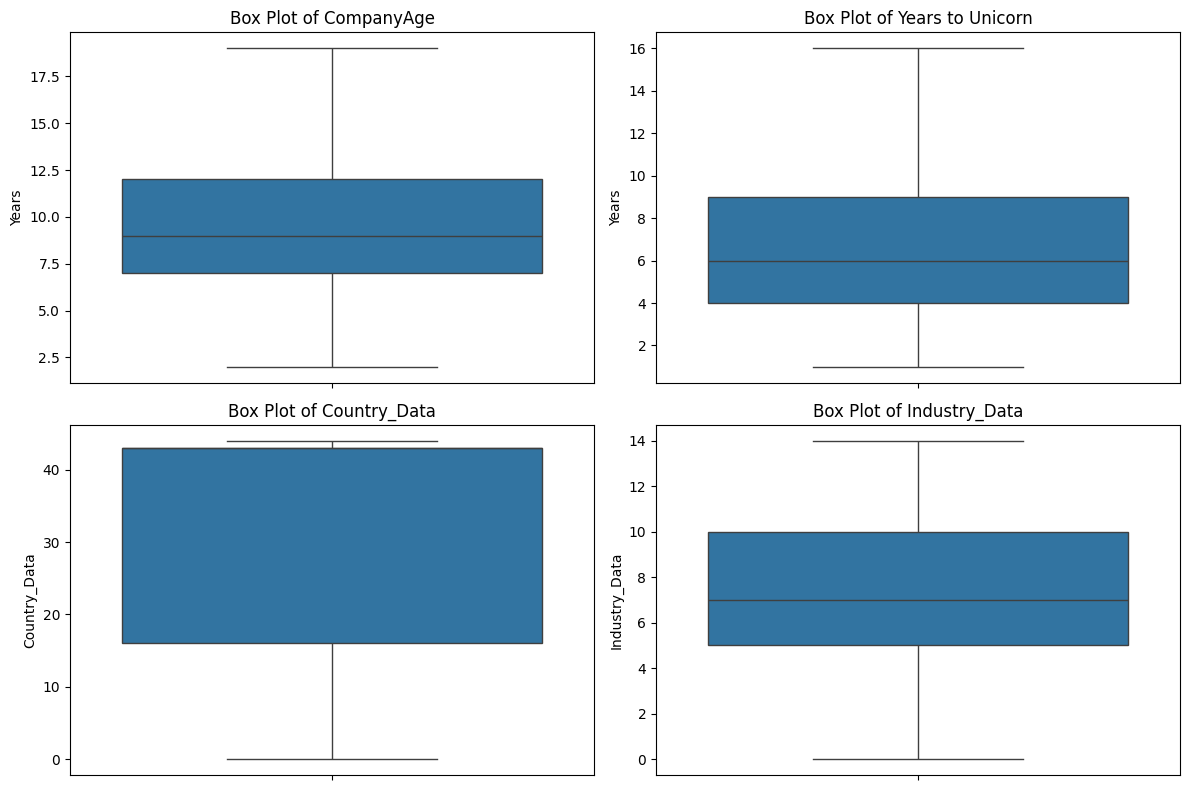

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create subplots with 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Box plot for CompanyAge
sns.boxplot(y=df['CompanyAge'], showfliers=False, ax=axes[0, 0])
axes[0, 0].set_title('Box Plot of CompanyAge')
axes[0, 0].set_ylabel('Years')

# Box plot for Years to Unicorn
sns.boxplot(y=df['Years to Unicorn'], showfliers=False, ax=axes[0, 1])
axes[0, 1].set_title('Box Plot of Years to Unicorn')
axes[0, 1].set_ylabel('Years')

# Box plot for Encoding_Country
sns.boxplot(y=df['Country_Data'], showfliers=False, ax=axes[1, 0])
axes[1, 0].set_title('Box Plot of Country_Data')
axes[1, 0].set_ylabel('Country_Data')

# Box plot for Encoding_Industry
sns.boxplot(y=df['Industry_Data'], showfliers=False, ax=axes[1, 1])
axes[1, 1].set_title('Box Plot of Industry_Data')
axes[1, 1].set_ylabel('Industry_Data')

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()


In [17]:
import pandas as pd
from scipy.stats import pearsonr

# Calculate the Pearson correlation coefficient, p-value, and t-test statistic between CompanyAge and Years to Unicorn
correlation_coef, p_value = pearsonr(df['CompanyAge'], df['Years to Unicorn'])

# Calculate the t-test statistic using the correlation coefficient and sample size
t_test_statistic = correlation_coef * (df['CompanyAge'].count() - 2) ** 0.5

print(f"Pearson Correlation Coefficient: {correlation_coef}")
print(f"T-Test Statistic: {t_test_statistic}")
print(f"P-Value: {p_value}")


Pearson Correlation Coefficient: 0.9393306840783114
T-Test Statistic: 30.248781678125756
P-Value: 0.0


In [18]:
from scipy import stats

t_statistic = 30.248781678125756
df = 1039 - 2  # Replace 'n' with your actual sample size

# Calculate the p-value for the two-tailed test
p_value = stats.t.sf(abs(t_statistic), df) * 2  # sf is the survival function, equivalent to 1 - cdf
p_value

1.3390571693861702e-144